In [1]:
# todo: process msgs with from sklearn.preprocessing import scale

In [2]:
import os
import IPython.display as ipd
from scipy.io import wavfile
from collections import Counter
from glob import glob
import numpy as np
import librosa
from tqdm import tqdm

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style()

%config InlineBackend.figure_format = 'retina'

In [4]:
TRAIN_DIR = '/d2/caches/tf-speech/train/audio'
TEST_DIR = '/d2/caches/tf-speech/test/audio'

In [5]:
SAMPLING_RATE = 16000
N_SAMPLES = 1.* 16000
N_FFT = 512
N_MELS = 128
DESIRED_MSG_W = 512
HOP_LEN = 1 + int(N_SAMPLES / (DESIRED_MSG_W - 1))


# compute msg for a wave
def compute_msg(wave,
                sr=SAMPLING_RATE,
                hop_length=HOP_LEN,
                n_fft=N_FFT,
                n_mels=N_MELS,
                desired_msg_w=DESIRED_MSG_W):

    # pad wave if neccessary to get the desired msg width
    desired_wave_len = hop_length * (desired_msg_w - 1)
    if desired_wave_len > len(wave):
        wave = np.pad(wave, (0, desired_wave_len - len(wave)), \
                      'constant', constant_values=(0.))

    msg = librosa.feature.melspectrogram(
        y=wave, sr=sr, hop_length=hop_length, n_fft=n_fft, n_mels=n_mels)
    msg = librosa.logamplitude(msg**2, ref_power=1.)
    msg = msg.astype(np.float32)

    return msg

In [6]:
# list all .wav files
train_files = glob(TRAIN_DIR + '/**/*.wav')
train_files = list(filter(lambda x: '_background_noise_/' not in x, train_files))
test_files = glob(TEST_DIR + '/*.wav')

In [7]:
# analyze lengths, sample rates, etc
sample_rates = Counter()
lengths = Counter()
mins = Counter()
maxs = Counter()
means = Counter()

for f in tqdm(train_files + test_files):
    sr, samples = wavfile.read(f)
    sample_rates[sr] += 1
    lengths[round(len(samples) / sr, 1)] += 1

100%|██████████| 223259/223259 [00:04<00:00, 48263.13it/s]


In [8]:
sample_rates

Counter({16000: 223259})

In [9]:
lengths

Counter({0.4: 12,
         0.5: 95,
         0.6: 377,
         0.7: 911,
         0.8: 1315,
         0.9: 2510,
         1.0: 218039})

In [10]:
# plot mel-scaled spectrograms
# https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html

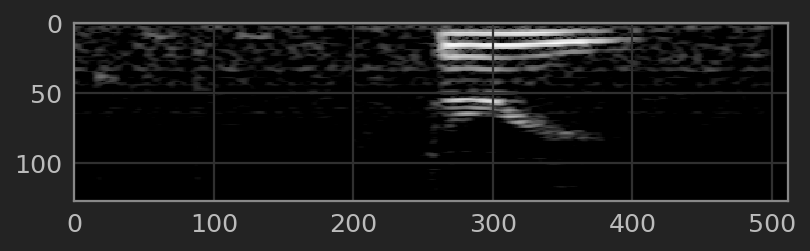

In [11]:
f = train_files[100]
sr, s = wavfile.read(f)
assert 1. == len(s) / sr

m = compute_msg(s)
assert m.shape == (N_MELS, DESIRED_MSG_W)

plt.imshow(m, cmap=plt.cm.gray)
ipd.Audio(f)

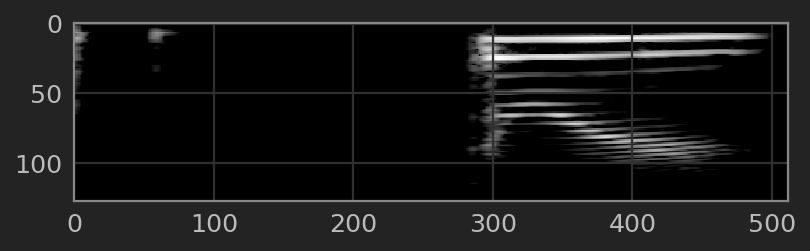

In [12]:
f = train_files[123]
sr, s = wavfile.read(f)
assert 1. == len(s) / sr

m = compute_msg(s)
assert m.shape == (N_MELS, DESIRED_MSG_W)

plt.imshow(m, cmap=plt.cm.gray)
ipd.Audio(f)